## **Employee Attrition Prediction - IBM Corporation**

## `Business Understanding`

`Problem:` IBM is a leading provider of IT services in the US. The company is currently experiencing significant attrition of employees and would like to build an algorithm to identify likely employees and get them to stay in the company.

`Goal:` To build a machine learning model that can be predict attrition. By identifying employees who are likely to leave the company in advance, IBM can implement targeted retention strategies to mitigate attrition and improve employee satisfaction and retention rates. 

`Null Hypothesis:` There is no significant correlation between monthly income and employee attrition.

`Alternative Hypothesis:` There is a statistically significant correlation between monthly income and employee attrition at IBM.
  
#### **Stakeholders**
- IBM Leadership: Executives and senior management responsible for strategic decision-making and organizational performance.
- Human Resources (HR) Department: HR professionals tasked with talent management, recruitment, and employee relations.
- Employees: Current and potential employees whose experiences and satisfaction are affected by attrition rates and retention strategies.
- Bureau of Labor Statistics: External stakeholders interested in workforce trends and industry benchmark

#### **Key Metrics and Success Criteria**
The success of this project will be evaluated based on several key metrics and success criteria, including:

- **Model Accuracy:** The ability of the machine learning model to accurately predict employee attrition.
- **Precision and Recall:** The balance between correctly identifying employees who are likely to leave (recall) and minimizing false positives (precision).
- **Model Interpretability** The degree to which the model's predictions and insights can be understood and utilized by stakeholders.
- **Business Impact:** The effectiveness of retention strategies implemented based on the model's recommendations in reducing attrition rates and improving overall employee satisfaction and retention.

#### **Ethical Considerations**:
It's essential to uphold ethical principles throughout the project, particularly concerning data privacy, fairness, and transparency. Any analyses or decisions made based on the model's predictions should prioritize the well-being and rights of employees, ensuring that no biases or discriminatory practices are perpetuated. Additionally, transparency in model development and decision-making processes is crucial to building trust among stakeholders and fostering a culture of accountability and integrity within the organization.

#### **Analytical Questions**
1. Which department has higher attrition?
2. What is the attrition rate at IBM?
3. Which of the features have more of a strong correlation to attrition?
4. Does age impact attrition?
5. Does the number of years an employee has worked in the company decrease or increase their attrition rate?

## `Data Understanding`

### **Feature Definitions**
1. **Age**: Age of employee
2. **Attrition**: Employee attrition status
3. **Department**: Department of work
4. **DistanceFromHome**: what is their distance from hime
5. **Education**: 1-Below College; 2- College; 3-Bachelor; 4-Master; 5-Doctor;
6. **EducationField**: The field they studies in in the University
7. **EnvironmentSatisfaction**: 1-Low; 2-Medium; 3-High; 4-Very High;
8. **JobSatisfaction**: 1-Low; 2-Medium; 3-High; 4-Very High;
9. **MaritalStatus**: Whether they are married, single or divorced
10. **MonthlyIncome**: How much an employee makes a month
11. **NumCompaniesWorked**: Number of companies worked prior to IBM
12. **WorkLifeBalance**: 1-Bad; 2-Good; 3-Better; 4-Best;
13. **YearsAtCompany**: Current years of service in IBM

### **Importations**

In [137]:
# Data analysisn manipulation packages
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Machine learning packages
from sklearn.model_selection import train_test_split
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder,  RobustScaler, OneHotEncoder, FunctionTransformer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

# Evaluation
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc

#Model Persistance
import joblib

### **Loading Data**

In [138]:
df  = pd.read_csv('../Data/attrition_data_ibm.csv')
df.head()

,Age,Attrition,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,JobSatisfaction,MaritalStatus,MonthlyIncome,NumCompaniesWorked,WorkLifeBalance,YearsAtCompany,ColumnX
0,41,Yes,Sales,1,2,Life Sciences,2,4,Single,5993.0,8,1.0,6.0,NaN
1,49,No,Research & Development,8,1,Life Sciences,3,2,Married,5130.0,1,3.0,10.0,NaN
2,37,Yes,Research & Development,2,2,Other,4,3,Single,2090.0,6,3.0,0.0,NaN
3,33,No,Research & Development,3,4,Life Sciences,4,3,Married,2909.0,1,3.0,8.0,NaN
4,27,No,Research & Development,2,1,Medical,1,2,Married,3468.0,9,3.0,2.0,NaN


#### Exploratory Data Analysis - EDA

In [139]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      1470 non-null   int64  
 1   Attrition                1470 non-null   object 
 2   Department               1465 non-null   object 
 3   DistanceFromHome         1470 non-null   int64  
 4   Education                1470 non-null   int64  
 5   EducationField           1468 non-null   object 
 6   EnvironmentSatisfaction  1470 non-null   int64  
 7   JobSatisfaction          1470 non-null   int64  
 8   MaritalStatus            1467 non-null   object 
 9   MonthlyIncome            1467 non-null   float64
 10  NumCompaniesWorked       1470 non-null   int64  
 11  WorkLifeBalance          1469 non-null   float64
 12  YearsAtCompany           1468 non-null   float64
 13  ColumnX                  0 non-null      float64
dtypes: float64(4), int64(6),

In [140]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,1470.0,36.923810,9.135373,18.0,30.0,36.0,43.0,60.0
DistanceFromHome,1470.0,9.192517,8.106864,1.0,2.0,7.0,14.0,29.0
Education,1470.0,2.912925,1.024165,1.0,2.0,3.0,4.0,5.0
EnvironmentSatisfaction,1470.0,2.721769,1.093082,1.0,2.0,3.0,4.0,4.0
JobSatisfaction,1470.0,2.728571,1.102846,1.0,2.0,3.0,4.0,4.0
MonthlyIncome,1467.0,6509.758010,4710.217686,1009.0,2911.0,4936.0,8380.5,19999.0
NumCompaniesWorked,1470.0,2.693197,2.498009,0.0,1.0,2.0,4.0,9.0
WorkLifeBalance,1469.0,2.761743,0.706437,1.0,2.0,3.0,3.0,4.0
YearsAtCompany,1468.0,7.014305,6.128186,0.0,3.0,5.0,9.0,40.0
ColumnX,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [141]:
df.duplicated().sum()

0

In [142]:
df.isna().sum()

Age                           0
Attrition                     0
Department                    5
DistanceFromHome              0
Education                     0
EducationField                2
EnvironmentSatisfaction       0
JobSatisfaction               0
MaritalStatus                 3
MonthlyIncome                 3
NumCompaniesWorked            0
WorkLifeBalance               1
YearsAtCompany                2
ColumnX                    1470
dtype: int64

In [143]:
df = df.drop('ColumnX', axis=1)
df.head()

,Age,Attrition,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,JobSatisfaction,MaritalStatus,MonthlyIncome,NumCompaniesWorked,WorkLifeBalance,YearsAtCompany
0,41,Yes,Sales,1,2,Life Sciences,2,4,Single,5993.0,8,1.0,6.0
1,49,No,Research & Development,8,1,Life Sciences,3,2,Married,5130.0,1,3.0,10.0
2,37,Yes,Research & Development,2,2,Other,4,3,Single,2090.0,6,3.0,0.0
3,33,No,Research & Development,3,4,Life Sciences,4,3,Married,2909.0,1,3.0,8.0
4,27,No,Research & Development,2,1,Medical,1,2,Married,3468.0,9,3.0,2.0


In [144]:
df.columns

Index(['Age', 'Attrition', 'Department', 'DistanceFromHome', 'Education',
       'EducationField', 'EnvironmentSatisfaction', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'NumCompaniesWorked',
       'WorkLifeBalance', 'YearsAtCompany'],
      dtype='object')

In [145]:
for i, column in enumerate(df.columns):
    print(f'Column-{i + 1}: {column}\n', df[column].unique())
    print('='* 70)

Column-1: Age
 [41 49 37 33 27 32 59 30 38 36 35 29 31 34 28 22 53 24 21 42 44 46 39 43
 50 26 48 55 45 56 23 51 40 54 58 20 25 19 57 52 47 18 60]
Column-2: Attrition
 ['Yes' 'No']
Column-3: Department
 ['Sales' 'Research & Development' nan 'Human Resources']
Column-4: DistanceFromHome
 [ 1  8  2  3 24 23 27 16 15 26 19 21  5 11  9  7  6 10  4 25 12 18 29 22
 14 20 28 17 13]
Column-5: Education
 [2 1 4 3 5]
Column-6: EducationField
 ['Life Sciences' 'Other' 'Medical' 'Marketing' 'Technical Degree' nan
 'Human Resources']
Column-7: EnvironmentSatisfaction
 [2 3 4 1]
Column-8: JobSatisfaction
 [4 2 3 1]
Column-9: MaritalStatus
 ['Single' 'Married' 'Divorced' nan]
Column-10: MonthlyIncome
 [5993. 5130. 2090. ... 9991. 5390. 4404.]
Column-11: NumCompaniesWorked
 [8 1 6 9 0 4 5 2 7 3]
Column-12: WorkLifeBalance
 [ 1.  3.  2. nan  4.]
Column-13: YearsAtCompany
 [ 6. 10.  0.  8.  2.  7.  1.  9.  5. nan 25.  3.  4. 12. 14. 22. 15. 27.
 21. 17. 11. 13. 37. 16. 20. 40. 24. 33. 19. 36. 18. 29. 31

In [146]:
df.isna().sum()

Age                        0
Attrition                  0
Department                 5
DistanceFromHome           0
Education                  0
EducationField             2
EnvironmentSatisfaction    0
JobSatisfaction            0
MaritalStatus              3
MonthlyIncome              3
NumCompaniesWorked         0
WorkLifeBalance            1
YearsAtCompany             2
dtype: int64

### **Univariate Analysis**

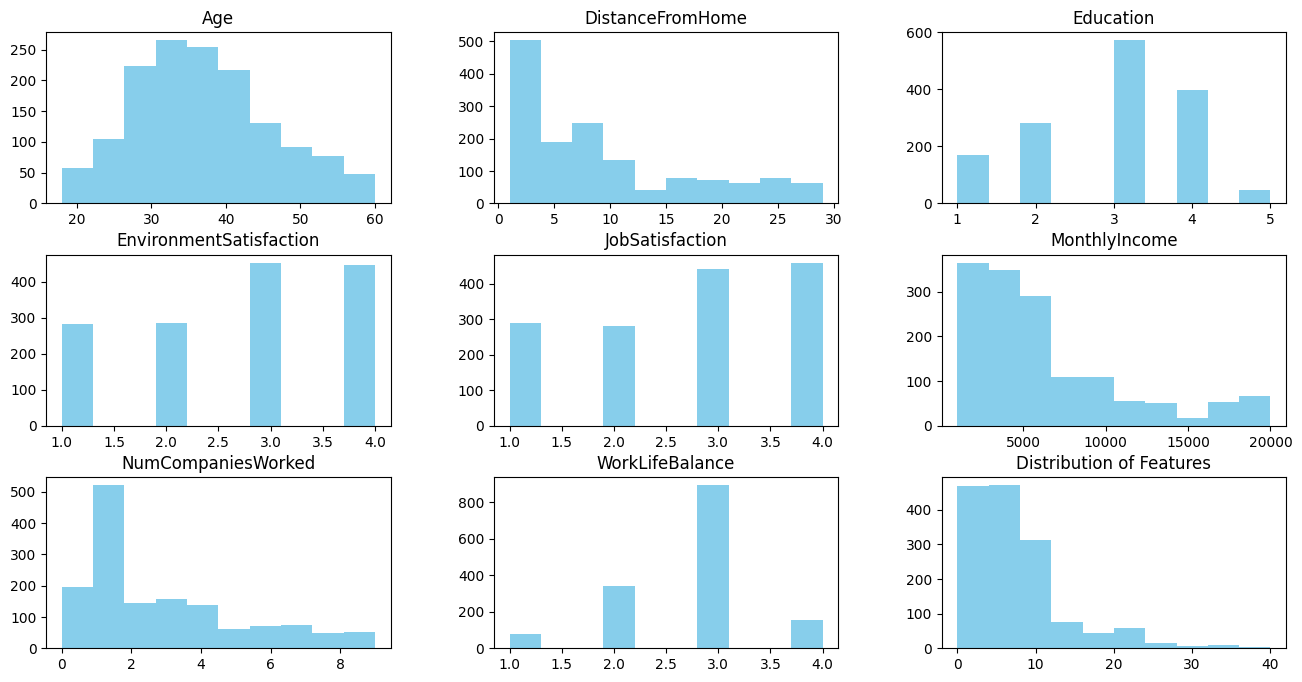

In [147]:
df.hist(figsize=(16, 8), grid=False, color='skyblue')
plt.title('Distribution of Features')
plt.show()

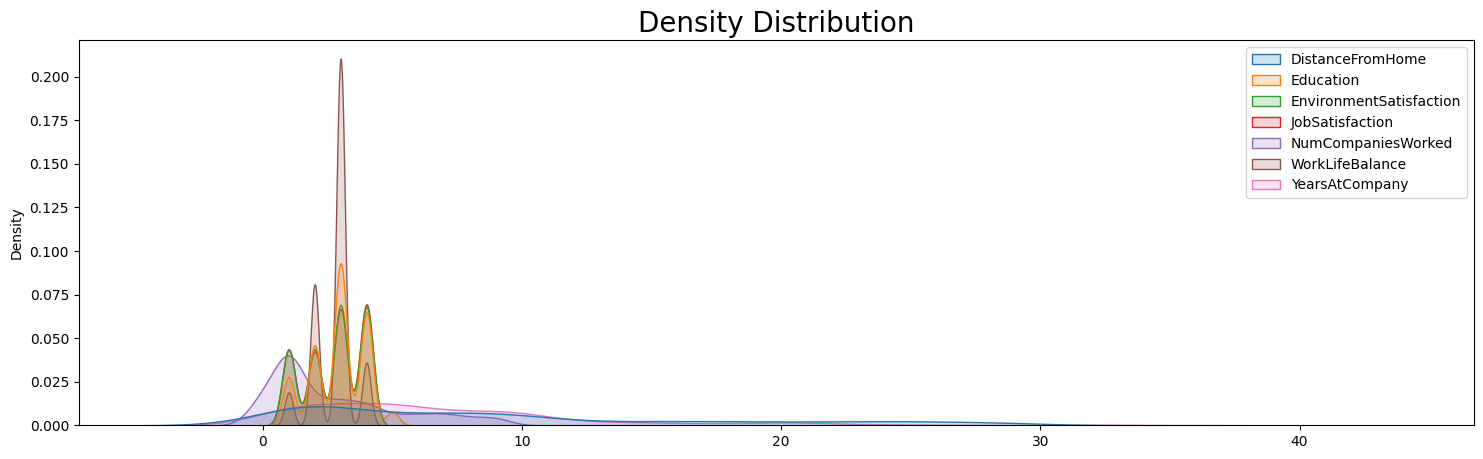

In [148]:
# Density Distribution
plt.figure(figsize=(18, 5))
sns.kdeplot(df.drop(['MonthlyIncome', 'Age'], axis=1), alpha=0.2, fill=True)
plt.title('Density Distribution', fontsize=20)
plt.show()

In [149]:
df.columns

Index(['Age', 'Attrition', 'Department', 'DistanceFromHome', 'Education',
       'EducationField', 'EnvironmentSatisfaction', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'NumCompaniesWorked',
       'WorkLifeBalance', 'YearsAtCompany'],
      dtype='object')

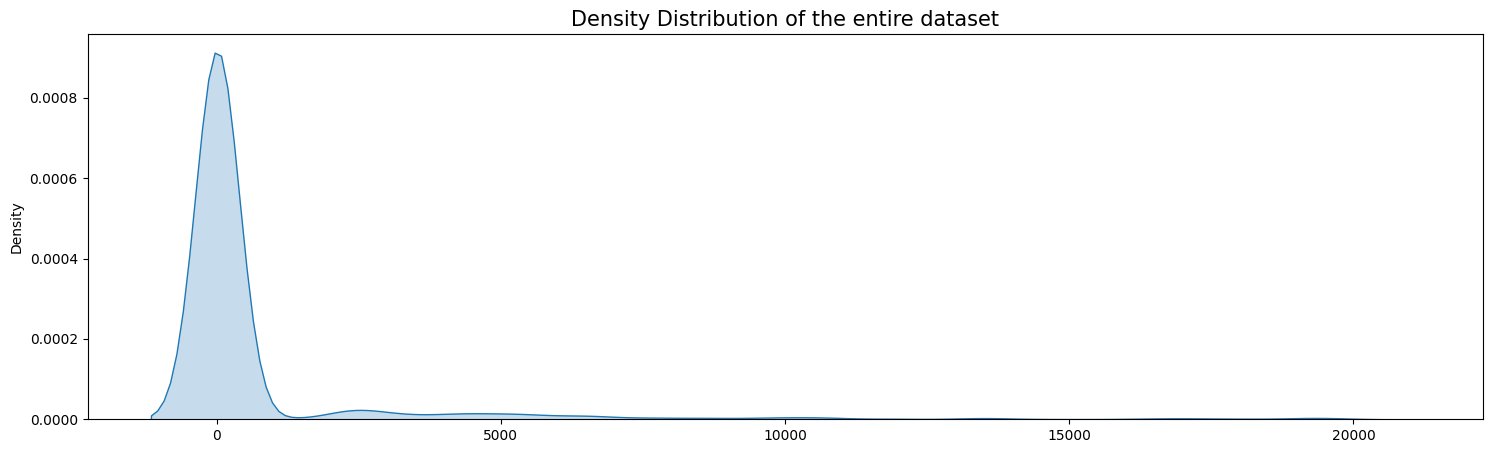

In [150]:
plt.figure(figsize=(18, 5))
sns.kdeplot(df.drop(['Department', 'EducationField',  'Attrition', 'MaritalStatus' ], axis=1).values.ravel(), fill=True)
plt.title('Density Distribution of the entire dataset', fontsize=15)
plt.show()

In [151]:
# Check for the categorical columns to exclude in the calculation of skewness
categorical_columns = df.select_dtypes('object').columns
categorical_columns

Index(['Attrition', 'Department', 'EducationField', 'MaritalStatus'], dtype='object')

In [152]:
# Check the skweness of the numeric columns 
df.drop(categorical_columns, axis=1).skew()

Age                        0.413286
DistanceFromHome           0.958118
Education                 -0.289681
EnvironmentSatisfaction   -0.321654
JobSatisfaction           -0.329672
MonthlyIncome              1.367137
NumCompaniesWorked         1.026471
WorkLifeBalance           -0.554299
YearsAtCompany             1.763215
dtype: float64

In [153]:
skew = df.drop(categorical_columns, axis=1).skew().sum()
print(f'The skewness of all the numeric features in the dataset is {round(skew, 2)}')

The skewness of all the numeric features in the dataset is 4.03


#### **Check for outliers**

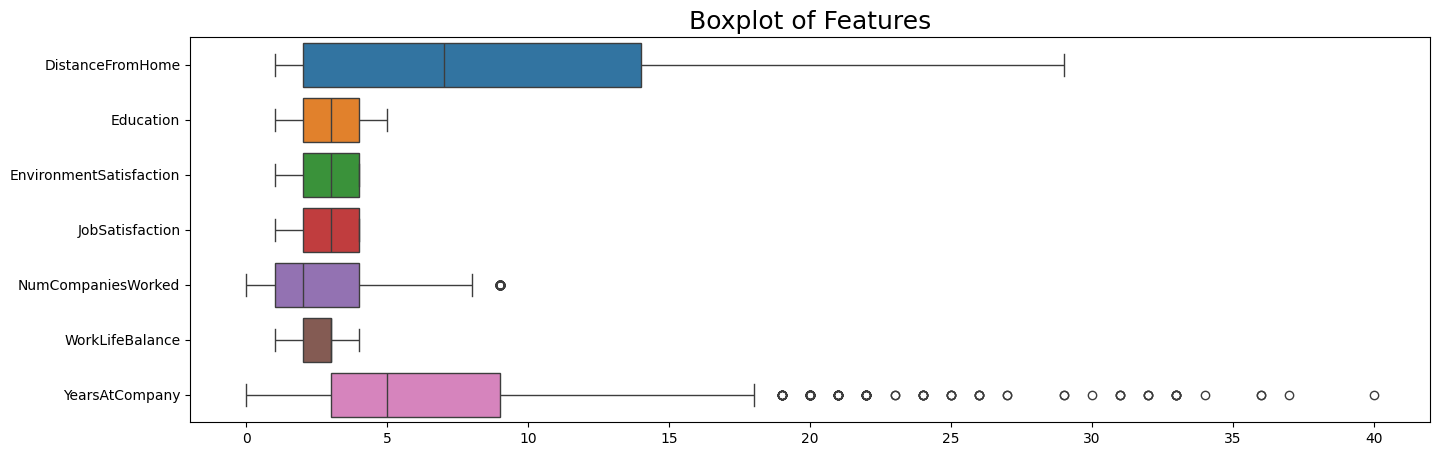

In [154]:
plt.figure(figsize=(16, 5)) 
sns.boxplot(df.drop(['MonthlyIncome', 'Age'], axis=1), orient='h')
plt.title('Boxplot of Features', fontsize=18)
plt.show()

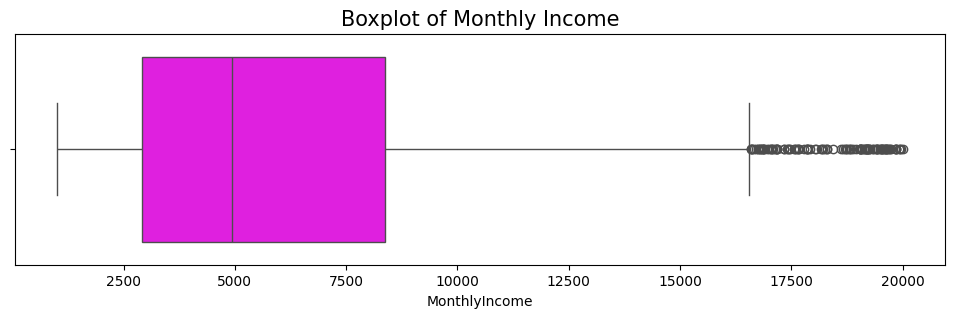

In [155]:
plt.figure(figsize=(12, 3)) 
sns.boxplot(df['MonthlyIncome'], orient='h', color='magenta')
plt.title('Boxplot of Monthly Income', fontsize=15)
plt.show()

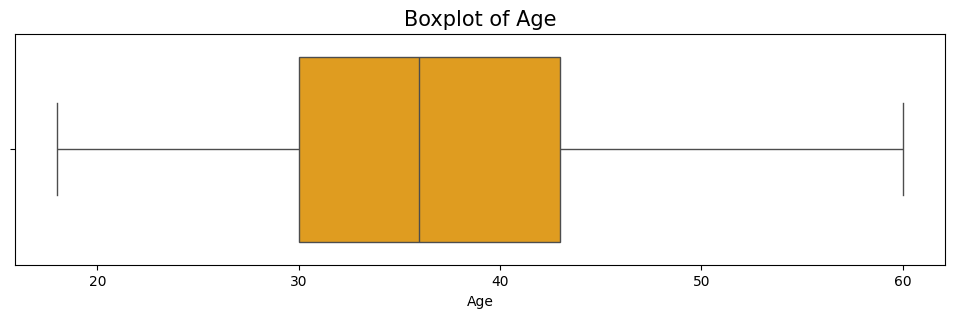

In [156]:
plt.figure(figsize=(12, 3)) 
sns.boxplot(df['Age'], orient='h', color='orange')
plt.title('Boxplot of Age', fontsize=15)
plt.show()

#### **Bi-variate Analysis**

In [157]:
#Check data types of columns
df.dtypes

Age                          int64
Attrition                   object
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EnvironmentSatisfaction      int64
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome              float64
NumCompaniesWorked           int64
WorkLifeBalance            float64
YearsAtCompany             float64
dtype: object

In [158]:
categorical_columns

Index(['Attrition', 'Department', 'EducationField', 'MaritalStatus'], dtype='object')

In [159]:
numeric_columns = df.select_dtypes('number').columns
numeric_columns

Index(['Age', 'DistanceFromHome', 'Education', 'EnvironmentSatisfaction',
       'JobSatisfaction', 'MonthlyIncome', 'NumCompaniesWorked',
       'WorkLifeBalance', 'YearsAtCompany'],
      dtype='object')

In [160]:
correlation = df[numeric_columns].corr()
correlation

,Age,DistanceFromHome,Education,EnvironmentSatisfaction,JobSatisfaction,MonthlyIncome,NumCompaniesWorked,WorkLifeBalance,YearsAtCompany
Age,1.000000,-0.001686,0.208034,0.010146,-0.004892,0.497359,0.299635,-0.021573,0.311074
DistanceFromHome,-0.001686,1.000000,0.021042,-0.016075,-0.003669,-0.017530,-0.029251,-0.024995,0.009708
Education,0.208034,0.021042,1.000000,-0.027128,-0.011296,0.094569,0.126317,0.009886,0.068593
EnvironmentSatisfaction,0.010146,-0.016075,-0.027128,1.000000,-0.006784,-0.005510,0.012594,0.027826,0.001714
JobSatisfaction,-0.004892,-0.003669,-0.011296,-0.006784,1.000000,-0.008843,-0.055699,-0.019286,-0.002952
MonthlyIncome,0.497359,-0.017530,0.094569,-0.005510,-0.008843,1.000000,0.148770,0.031009,0.513625
NumCompaniesWorked,0.299635,-0.029251,0.126317,0.012594,-0.055699,0.148770,1.000000,-0.007401,-0.118667
WorkLifeBalance,-0.021573,-0.024995,0.009886,0.027826,-0.019286,0.031009,-0.007401,1.000000,0.012438
YearsAtCompany,0.311074,0.009708,0.068593,0.001714,-0.002952,0.513625,-0.118667,0.012438,1.000000


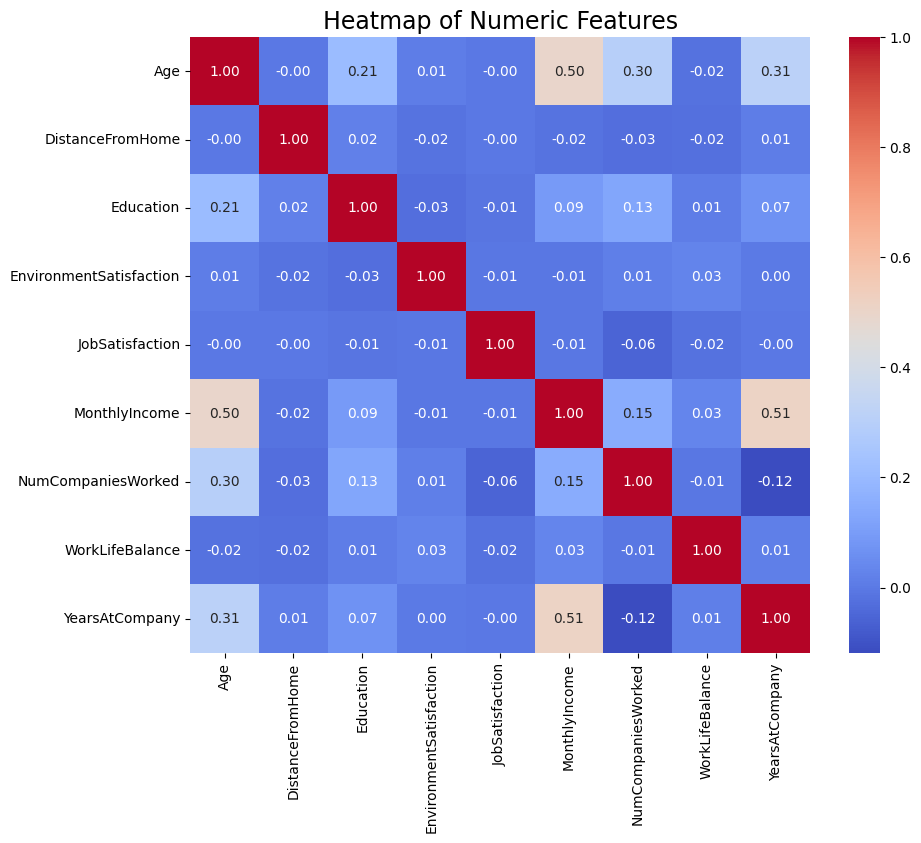

In [161]:
plt.figure(figsize=(10, 8)) 
sns.heatmap(correlation, annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Heatmap of Numeric Features', fontsize=17)
plt.show()

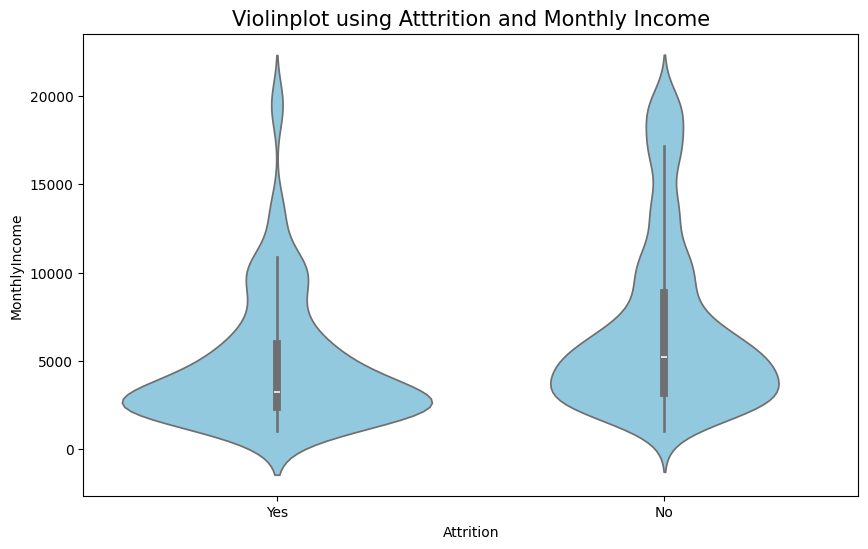

In [162]:
plt.figure(figsize=(10, 6))
sns.violinplot(data=df, x='Attrition', y='MonthlyIncome',color='skyblue')
plt.title('Violinplot using Atttrition and Monthly Income', fontsize=15)
plt.show()

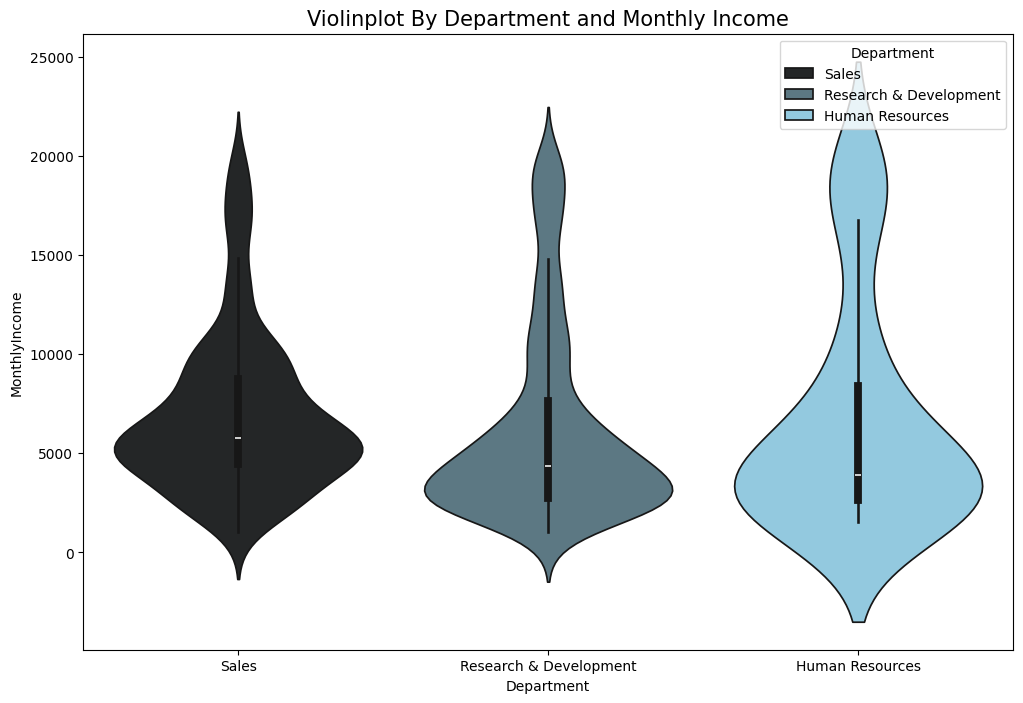

In [163]:
plt.figure(figsize=(12, 8))
sns.violinplot(data=df, x='Department', y='MonthlyIncome', hue='Department', palette='dark:skyblue')
plt.title('Violinplot By Department and Monthly Income', fontsize=15)
plt.show()

#### **Answering Analytical Questions**

**1. Which department has higher attrition?**

In [164]:
grouped_attrition = df.groupby('Department')['Attrition'].value_counts().rename('Breakdown').reset_index()
grouped_attrition

,Department,Attrition,Breakdown
0,Human Resources,No,51
1,Human Resources,Yes,12
2,Research & Development,No,824
3,Research & Development,Yes,132
4,Sales,No,354
5,Sales,Yes,92


In [165]:
grouped_attrition['Ratio'] = grouped_attrition.groupby('Department')['Breakdown'].transform(lambda x: round(x/ x.sum() * 100, 2))

grouped_attrition

,Department,Attrition,Breakdown,Ratio
0,Human Resources,No,51,80.95
1,Human Resources,Yes,12,19.05
2,Research & Development,No,824,86.19
3,Research & Development,Yes,132,13.81
4,Sales,No,354,79.37
5,Sales,Yes,92,20.63


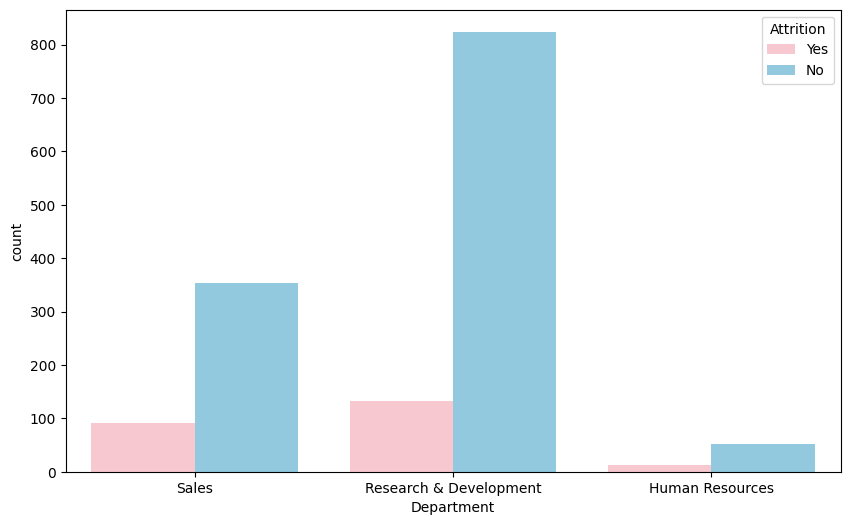

In [166]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Department', hue='Attrition', palette={'Yes': 'pink', 'No': 'skyblue'})
plt.show()

**2. What is the attrition rate at IBM?**

In [167]:
df['Attrition'].value_counts().rename('Total Attrition').reset_index()

,Attrition,Total Attrition
0,No,1233
1,Yes,237


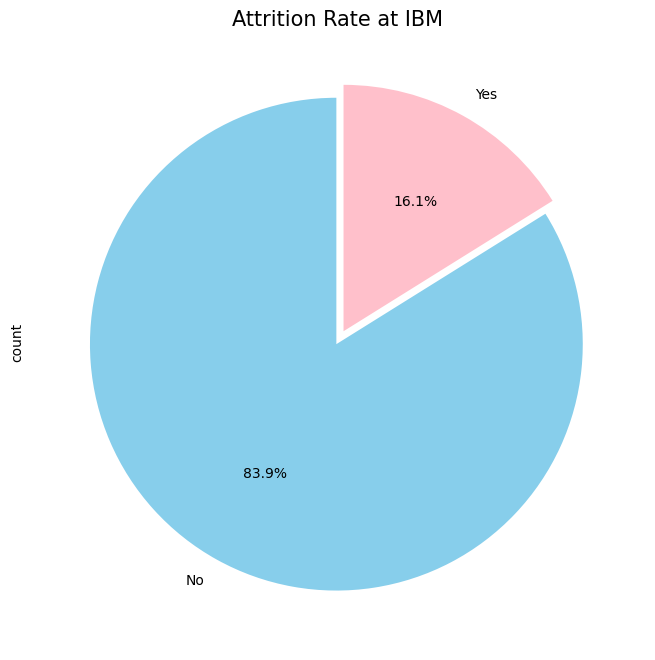

In [168]:
plt.figure(figsize=(10, 8))
df['Attrition'].value_counts().plot.pie(startangle=90, explode=(0.01, 0.05), colors=['skyblue', 'pink'], autopct='%.1f%%')
plt.title('Attrition Rate at IBM', fontsize=15)
plt.show()

## `Data Preparation`

- #### Check if dataset is balanced

In [169]:
class_distro = df['Attrition'].value_counts().rename('Total').reset_index()
class_distro

,Attrition,Total
0,No,1233
1,Yes,237


In [170]:
class_distro['Ratio'] = class_distro['Total'].apply(lambda x:  round((x/class_distro['Total'].sum() * 100), 2))
class_distro

,Attrition,Total,Ratio
0,No,1233,83.88
1,Yes,237,16.12


#### **Split Dataset into Training and Evaluation**

- X = input_data
- y = label

In [171]:
X = df.drop('Attrition', axis=1)
y = df['Attrition']

In [172]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y) 

In [173]:
encoder = LabelEncoder()
y_train_encoded = encoder.fit_transform(y_train)
y_test_encoded = encoder.transform(y_test)

#### **Prepare Pipelines**

In [174]:
categorical_columns = X.select_dtypes('object').columns
categorical_columns

Index(['Department', 'EducationField', 'MaritalStatus'], dtype='object')

In [175]:
numeric_columns = X.select_dtypes('number').columns
numeric_columns

Index(['Age', 'DistanceFromHome', 'Education', 'EnvironmentSatisfaction',
       'JobSatisfaction', 'MonthlyIncome', 'NumCompaniesWorked',
       'WorkLifeBalance', 'YearsAtCompany'],
      dtype='object')

In [176]:
X['Department'].unique()

array(['Sales', 'Research & Development', nan, 'Human Resources'],
      dtype=object)

In [177]:
#Create 2 pipelines for both categorical and numeric columns and combine them in a final preprocessor
numeric_pipeline = Pipeline(steps=[
    ('num_imputer', SimpleImputer(strategy='median')),
    ('scaler', RobustScaler()),
    # ('log_transformer', FunctionTransformer(np.log1p))
])

categorical_pipeline = Pipeline(steps=[
    ('cat_imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OneHotEncoder()),
])

preprocesor = ColumnTransformer(transformers=[
    ('num_pipeline', numeric_pipeline, numeric_columns),
    ('cat_pipeline', categorical_pipeline, categorical_columns)
])

## `Modelling & Evaluation` 

In [178]:
# List models to train
models = [
    ('Decision_Tree', DecisionTreeClassifier(random_state=42)),
    ('Logistic Regression', LogisticRegression(random_state=42)),
    ('KNN', KNeighborsClassifier(n_neighbors=5)),
    ('Random Forest', RandomForestClassifier(random_state=42))
]

#### **Train Data on Unbalanced Dataset**

In [179]:
# create a place to hold trained models
all_pipelines = {}

#Create a data frame to store all the models metrics
metric_table = pd.DataFrame(columns=['model_name', 'accuracy', 'precision', 'recall', 'f1_score'])

for model_name, classifier in models:

    # Creating final pipeline with preprocessor and estimator
    final_pipeline = Pipeline(steps=[
        ('preprocesor', preprocesor),
        ('classifier', classifier)
    ])

    # Fit date to pipeline  
    final_pipeline.fit(X_train, y_train_encoded)

    #Add all pipelines into the all_pipeline dictionary
    all_pipelines[model_name] = final_pipeline

    # Predicting on evaluation/test set
    y_pred = final_pipeline.predict(X_test)

    # Generate classification report for each pipeline or model
    metrics = classification_report(y_test_encoded, y_pred, output_dict=True)

    # Grab all important metrics
    accuracy = metrics['accuracy']
    precision = metrics['weighted avg']['precision']
    recall = metrics['weighted avg']['recall']
    f1 = metrics['weighted avg']['f1-score']

    # Add the key metrics to the metrics table
    metric_table.loc[len(metric_table)] = [model_name, accuracy, precision, recall, f1]


metric_table.sort_values(by='f1_score', ascending=False)


,model_name,accuracy,precision,recall,f1_score
1,Logistic Regression,0.841270,0.801552,0.841270,0.797966
3,Random Forest,0.832200,0.781537,0.832200,0.789232
2,KNN,0.825397,0.767807,0.825397,0.782098
0,Decision_Tree,0.759637,0.762351,0.759637,0.760981


In [180]:
all_pipelines['Logistic Regression']

Pipeline(steps=[('preprocesor',
                 ColumnTransformer(transformers=[('num_pipeline',
                                                  Pipeline(steps=[('num_imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   RobustScaler())]),
                                                  Index(['Age', 'DistanceFromHome', 'Education', 'EnvironmentSatisfaction',
       'JobSatisfaction', 'MonthlyIncome', 'NumCompaniesWorked',
       'WorkLifeBalance', 'YearsAtCompany'],
      dtype='object')),
                                                 ('cat_pipeline',
                                                  Pipeline(steps=[('cat_imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encoder',
                                                                   OneHotEncoder())]),
                                                  Index(['Department', 'EducationField', 'MaritalStatus'], dtype='object'))])),
                ('classifier', LogisticRegression(random_state=42))])

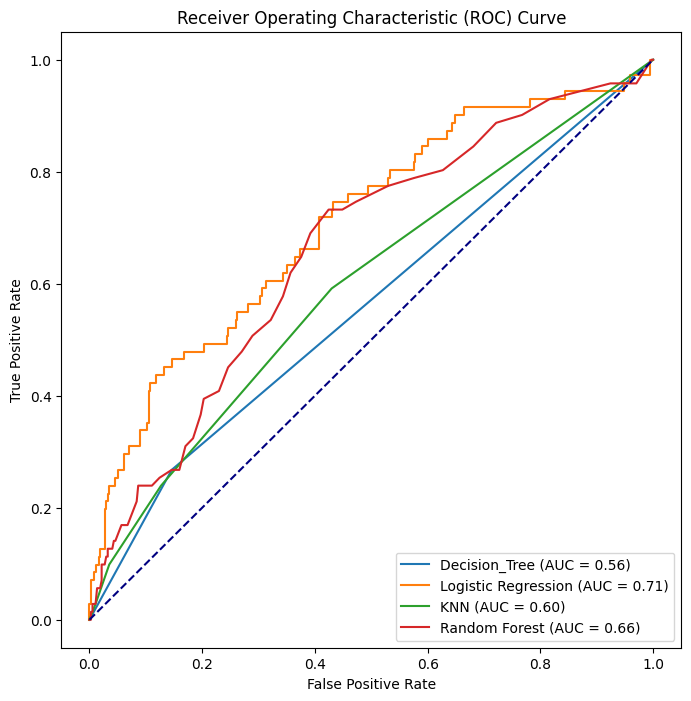

In [181]:
fig, ax = plt.subplots(figsize=(8, 8))

roc_curve_data = {}

for model_name, pipeline in all_pipelines.items():

    y_score = pipeline.predict_proba(X_test)[:, 1]

    fpr, tpr, threshold = roc_curve(y_test_encoded, y_score)
    roc_auc = auc(fpr, tpr)

    roc_curve_df = pd.DataFrame({'False Positve Rate': fpr, 'True Positve Rate': tpr, 'Threshold': threshold})

    roc_curve_data[model_name] = roc_curve_df

    ax.plot(fpr, tpr, label=f'{model_name} (AUC = {roc_auc:.2f})')

ax.plot([0, 1], [0, 1], color='navy', linestyle='--')
ax.set_xlabel('False Positive Rate')
ax.set_ylabel('True Positive Rate')
ax.set_title('Receiver Operating Characteristic (ROC) Curve')
ax.legend(loc='lower right')
plt.show()

### **Model Persistance**

In [182]:
# Persist the trained pipelines along with label encoder
for model_name, pipeline in all_pipelines.items():
    # Save the pipeline object
    joblib.dump(pipeline, f'../models/{model_name}_pipeline.joblib')

# Save label encoder separately
joblib.dump(encoder, '../models/label_encoder.joblib')

['../models/label_encoder.joblib']